<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_56_to_57.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LEZIONE_56
#In questo capitolo si analizzano le caratteristiche dell' Ingegneria di un sistema di trading che sfrutta l'analisi tecnica
#In un Sistema di trading la parte più importante non è il MODELLO, ma i DATI

In [ ]:
#Installare le librerie necessarie
!pip install yfinance
!pip install ta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf


In [ ]:
#IMPORTANTE: Questo è il codice per creare un grafico BLACK della misura ottimale
from matplotlib import cycler
colors= cycler('color',
               ['#669FEE','#66EE91','#9988DD',
                '#EECC55','#88BB44','#FFBBBB'])
plt.rc('figure',facecolor='#313233')
plt.rc('axes',facecolor='#313233',edgecolor='none',
       axisbelow=True,grid=True,prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid',color='474A4A',linestyle='solid')
plt.rc('xtick',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('legend',facecolor='#313233',edgecolor='#313233')
plt.rc('text',color='C9C9C9')
plt.rcParams['figure.figsize']=[20,8]


In [ ]:
#Ho inserito il plt.style solamente qui perché non mi era possibile inserirlo
#quando ho imortato le librerie
plt.style.use="seaborn"

In [ ]:
#df=yf.download("GOOG")
#dtype=df.dtypes
#df.head()

MODIFICA: Il DataFrame di Yfinance mi sta creando problemi perché non è allineato con quello utilizzato nel corso ("manca la colonna Adj Close"), quindi preferisco utilizzare un dataframe nuovo (MT5) provando a verificare se i dati sono puliti e l'output è realistico

In [ ]:
#importo un nuovo set di dati direttamente dal mio pc e li importo per poi
#indicizzarli e poterli utilizzare
df=pd.read_csv("/content/AMZN_H1_202001021600_202501312200.csv",delimiter="\t").dropna()
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0


In [ ]:
df.columns=["Date","Time","Open","High","Low","Close","TickVol","Volume","Spread"]
df.head()


,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0


IMPORTANTE: Si deve sempre trovare un'accordo (AGREEMENT) per i nomi dell'indice (o comunque per i dati che andremo a monitorare più in generale), nell'ingegneria di un sistema di trading dobbiamo sempre allineare tutti i nostri dati in modo che siano omogeneizzati e facilmente manipolabili

In [ ]:
#Creare un SMA usando PANDAS

ATTENZIONE: Se si utilizza in maniera erronea la funzione ROLLING possiamo rischiare di avere un backtest assolutamente falsato, poichè in realtà "utilizzerebbe il futuro per predire il passato"

ESEMPIO: Come vediamo sopra abbiamo creato una SMA a 3 periodi. Come possiamo vedere il risultato in output della media al terzo giorno è nella stessa axis del giorno 3. se prendiamo in considerazione la colonna ["close"] come prezzo da cui estrapolare la media mobile, il prezzo del terzo giorno è coinvolto nel calcolo della media. Questo si tradurrebbe in un backtest sicuramente PIù ACCURATO MA FALSATO

Per questo dobbiamo sempre ricordarci di inserire nel codice delle medie mobili il metodo SHIFT

In [ ]:
#Adesso genero le medie mobili, inserendo anche la "SMA 3" per mostrare quanto
#detto sopra
df["SMA 15"]= df["Close"].rolling(15).mean()
df["SMA 60"]= df["Close"].rolling(60).mean()
df["SMA 3"]= df["Close"].rolling(3).mean()
df

,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread,SMA 15,SMA 60,SMA 3
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0,NaN,NaN,NaN
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0,NaN,NaN,NaN
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0,NaN,NaN,93.530000
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0,NaN,NaN,93.663333
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0,NaN,NaN,94.063333
...,...,...,...,...,...,...,...,...,...,...,...,...
8889,2025.01.31,18:00:00,239.29,239.80,238.47,239.57,5717,0,3,236.749333,234.722833,239.340000
8890,2025.01.31,19:00:00,239.58,239.85,238.49,239.42,5605,0,3,236.876000,234.947167,239.426667
8891,2025.01.31,20:00:00,239.43,240.28,238.14,238.64,6250,0,3,236.946667,235.120833,239.210000
8892,2025.01.31,21:00:00,238.64,238.93,236.89,238.11,6272,0,3,236.984000,235.274667,238.723333


In [ ]:
#adesso ricreo le due medie mobili, ma utilizzando il metodo ("shift")
df["SMA 15"]= df["Close"].rolling(15).mean().shift(1)
df["SMA 60"]= df["Close"].rolling(60).mean().shift(1)
del df["SMA 3"]
df

,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread,SMA 15,SMA 60
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0,NaN,NaN
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0,NaN,NaN
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0,NaN,NaN
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0,NaN,NaN
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8889,2025.01.31,18:00:00,239.29,239.80,238.47,239.57,5717,0,3,236.668667,234.500500
8890,2025.01.31,19:00:00,239.58,239.85,238.49,239.42,5605,0,3,236.749333,234.722833
8891,2025.01.31,20:00:00,239.43,240.28,238.14,238.64,6250,0,3,236.876000,234.947167
8892,2025.01.31,21:00:00,238.64,238.93,236.89,238.11,6272,0,3,236.946667,235.120833


In [ ]:
#adesso ricreo le due medie mobili, ma utilizzando il metodo ("shift")
df["SMA 15"]= df["Close"].rolling(15).mean().shift(1)
df["SMA 60"]= df["Close"].rolling(60).mean().shift(1)
del df["SMA 3"]
df


,Date,Time,Open,High,Low,Close,TickVol,Volume,Spread,SMA 15,SMA 60
0,2020.01.02,16:00:00,93.86,93.95,93.20,93.42,2921,0,0,NaN,NaN
1,2020.01.02,17:00:00,93.42,93.68,93.29,93.45,1951,0,0,NaN,NaN
2,2020.01.02,18:00:00,93.45,93.74,93.30,93.72,1637,0,0,NaN,NaN
3,2020.01.02,19:00:00,93.72,93.94,93.72,93.82,1493,0,0,NaN,NaN
4,2020.01.02,20:00:00,93.82,94.67,93.81,94.65,1773,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8889,2025.01.31,18:00:00,239.29,239.80,238.47,239.57,5717,0,3,236.668667,234.500500
8890,2025.01.31,19:00:00,239.58,239.85,238.49,239.42,5605,0,3,236.749333,234.722833
8891,2025.01.31,20:00:00,239.43,240.28,238.14,238.64,6250,0,3,236.876000,234.947167
8892,2025.01.31,21:00:00,238.64,238.93,236.89,238.11,6272,0,3,236.946667,235.120833


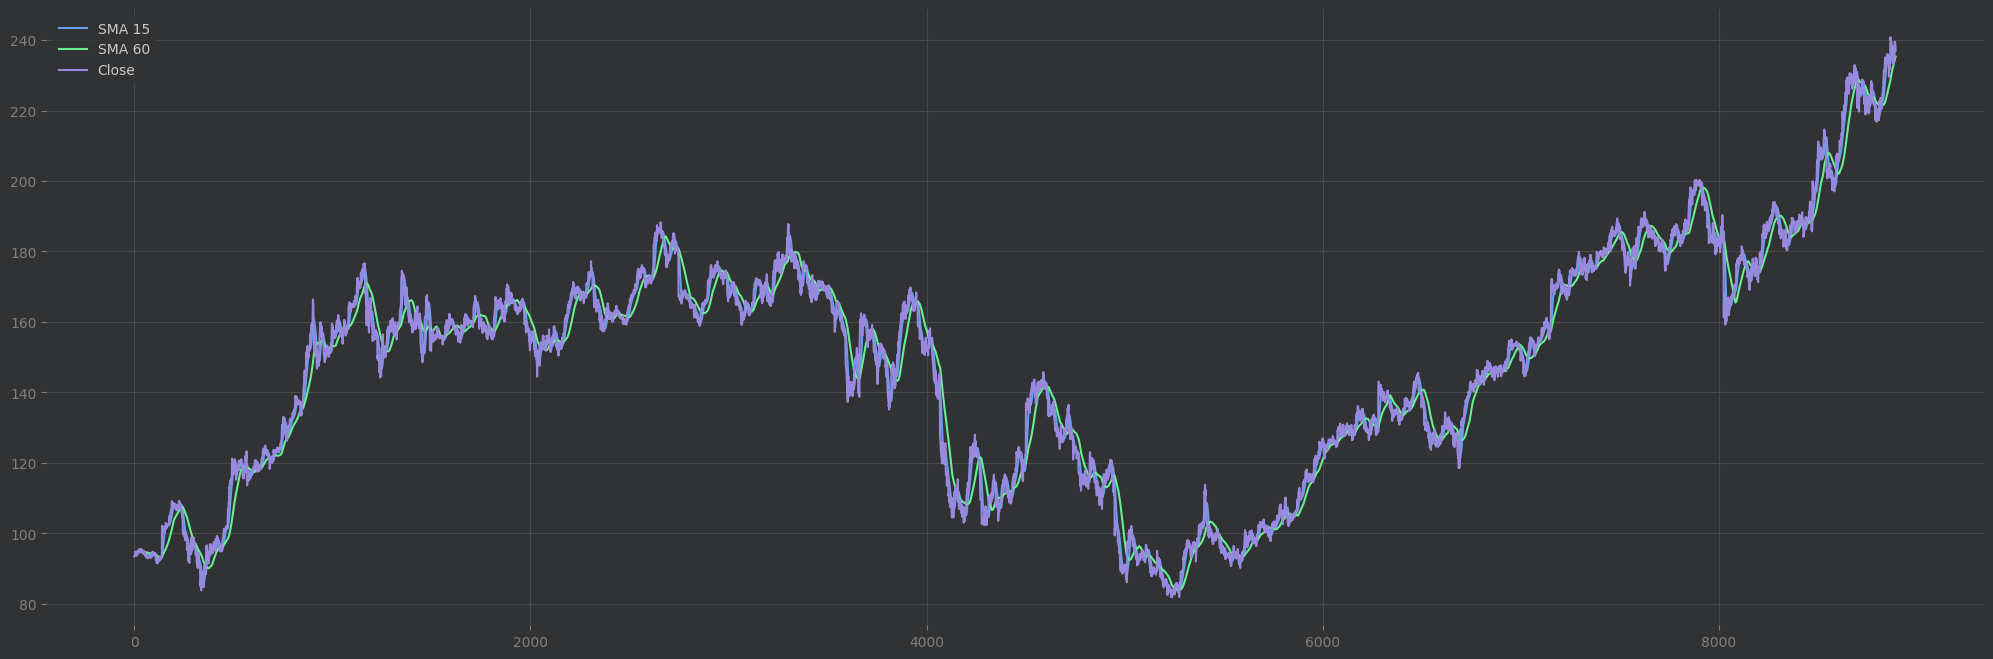

In [ ]:
#Adessso vado a mettere su display la strategia per visualizzarne le performance
df= df[["SMA 15", "SMA 60", "Close"]]. plot(figsize=(25,8))

In [ ]:
#Ovviamente nell'output c'è qualcosa di errato e dipende dall'estrapolazione dei dati,
#poichè nel mio Dataset mancava la colonna ["Adj Close"]

Per adesso, per poter andare avanti con il corso ce la facciamo andare bene anche così. Da correggere in seguito

In [ ]:
#LEZIONE 58: Creare una  MOVING STANDARD DEVIATION (MSD)
#La MSD di un  prezzo in realtà è semplicemnte la sua VOLATILITà
df["returns"]=df["Close"].pct_change(1)
df["MSD 15"]= df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"]= df[["returns"]].rolling(60).std().shift(1)

TypeError: 'Axes' object is not subscriptable